# XGBoost: Model Evaluation (No Age Sex)

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
import pickle
import time
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading Data and XGBoost Model

In [2]:
# Load data
# Import train and test data into dataframes from csv files produced using the data processing code
df_train = pd.read_csv("train_noagesex.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("test_noagesex.csv", header=None)
# Get data from dataframes
train_y = np.array(df_train[9].values).astype(np.int8)
train_x = np.array(df_train[list(range(9))].values)
test_y = np.array(df_test[9].values).astype(np.int8)
test_x = np.array(df_test[list(range(9))].values)

In [3]:
# load model from file
model = pickle.load(open("XGBoost_noagesex.model", "rb"))

## Model Evaluation

In [4]:
start_time = time.time()

## test the model on the test data
pred_test = model.predict(test_x)
# get f1 score of the model & print it. The f1 score considers the precision & recall.
f1 = f1_score(test_y, pred_test, average="macro")
print("Test f1 score : %s "% f1)

# get ROC AUC score of the model & print it
roc = roc_auc_score(test_y, pred_test)
print("Test ROC AUC score : %s "% roc)

# get the accuracy and print it
acc = accuracy_score(test_y, pred_test)
print("Test accuracy score : %s "% acc)

print("--- %s seconds ---" % (time.time() - start_time))

Test f1 score : 0.9746699775041925 
Test ROC AUC score : 0.9680063505284129 
Test accuracy score : 0.9778267365116587 
--- 0.4524729251861572 seconds ---


In [5]:
# 10-fold cross validation on the test data 
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, test_x, test_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 97.44% (0.18%)


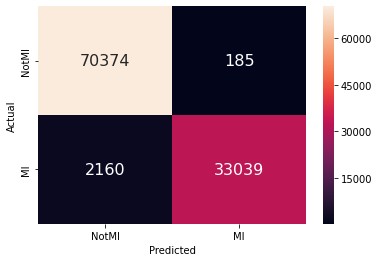

In [6]:
# Confusion matrix
confusion = confusion_matrix(test_y, pred_test)
# annot = True to print the values inside the square
sns.heatmap(data=confusion, annot=True, xticklabels=["NotMI", "MI"], yticklabels=["NotMI", "MI"], fmt = "d", annot_kws={"fontsize":16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.yticks(va="center")
plt.show()

In [7]:
print(classification_report(test_y, pred_test, digits=4))

              precision    recall  f1-score   support

           0     0.9702    0.9974    0.9836     70559
           1     0.9944    0.9386    0.9657     35199

    accuracy                         0.9778    105758
   macro avg     0.9823    0.9680    0.9747    105758
weighted avg     0.9783    0.9778    0.9777    105758

